This code will represent how much money each country representative earned. I want to count all the money through history and add see wher this may lead to.

In [3]:
import pandas as pd
import numpy as np
import warnings
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns

In [5]:
PP_11 = pd.read_csv('TI_ScrappedData/TI_2011/PrizePoolFinalStandings.csv')
PP_12 = pd.read_csv('TI_ScrappedData/TI_2012/PrizePoolFinalStandings.csv')
PP_13 = pd.read_csv('TI_ScrappedData/TI_2013/PrizePoolFinalStandings.csv')
PP_14 = pd.read_csv('TI_ScrappedData/TI_2014/PrizePoolFinalStandings.csv')

PP_15 = pd.read_csv('TI_ScrappedData/TI_2015/PrizePoolFinalStandings.csv')
PP_16 = pd.read_csv('TI_ScrappedData/TI_2016/PrizePoolFinalStandings.csv')
PP_17 = pd.read_csv('TI_ScrappedData/TI_2017/PrizePoolFinalStandings.csv')
PP_18 = pd.read_csv('TI_ScrappedData/TI_2018/PrizePoolFinalStandings.csv')
PP_19 = pd.read_csv('TI_ScrappedData/TI_2019/PrizePoolFinalStandings.csv')
PP_21 = pd.read_csv('TI_ScrappedData/TI_2021/PrizePoolFinalStandings.csv')

PP_test = PP_11

PP_temp = [PP_11,PP_12,PP_13,PP_14]

PP = [PP_11,PP_12,PP_13,PP_14,PP_15,PP_16,PP_17,PP_18,PP_19,PP_21]

print(PP_test.dtypes)
PP_test

Unnamed: 0           int64
Place               object
Price               object
PricePoolPercent    object
Team Name           object
dtype: object


,Unnamed: 0,Place,Price,PricePoolPercent,Team Name
0,0,1st,"$1,000,000",62.5%,Natus Vincere
1,1,2nd,"$250,000",15.625%,EHOME
2,2,3rd,"$150,000",9.375%,Scythe Gaming
3,3,4th,"$80,000",5%,Meet Your Makers
4,4,5th-6th,"$35,000",2.1875%,Moscow Five
5,5,5th-6th,"$35,000",2.1875%,Invictus Gaming
6,6,7th-8th,"$25,000",1.5625%,Nirvana.int
7,7,7th-8th,"$25,000",1.5625%,Made in Thailand
8,8,9th-12th,-,-,Virus Gaming
9,9,9th-12th,-,-,TYLOO


In [6]:
PP_21

,Unnamed: 0,Place,$USD,Percent,Team
0,1,1st,"$18,208,300",45.5%,Team Spirit
1,2,2nd,"$5,202,400",13%,PSG.LGD
2,3,3rd,"$3,601,600",9%,Team Secret
3,4,4th,"$2,401,100",6%,Invictus Gaming
4,5,5th-6th,"$1,400,600",3.5%,Virtus.pro
5,6,5th-6th,"$1,400,600",3.5%,Vici Gaming
6,7,7th-8th,"$1,000,500",2.5%,OG
7,8,7th-8th,"$1,000,500",2.5%,T1
8,9,9th-12th,"$800,400",2%,Fnatic
9,10,9th-12th,"$800,400",2%,Quincy Crew


In [7]:
#simple column rename to make formats same, one must remember 
for df in PP:
    df.rename(columns={'Price':'USD', 'PricePoolPercent':'Pcnt','Team Name':'Team'},inplace=True) 
    df.rename(columns={'$USD':'USD', 'Percent':'Pcnt'},inplace=True)
PP_test = PP_11

In [8]:
#Change str into int dtype
def Int_maker(df):
    df['USD'] = df['USD'].str.replace('$', '')
    df['USD'] = df['USD'].str.replace(',', '')
    df['USD'] = df['USD'].str.replace('-', '0')
    df['USD'] = df['USD'].astype(int)
    return df

In [9]:
for df in PP:
    Int_maker(df)

In [12]:
pd.set_option('display.max_rows', None)
Teams = pd.concat(PP)
Teams

,Unnamed: 0,Place,USD,Pcnt,Team
0,0,1st,1000000,62.5%,Natus Vincere
1,1,2nd,250000,15.625%,EHOME
2,2,3rd,150000,9.375%,Scythe Gaming
3,3,4th,80000,5%,Meet Your Makers
4,4,5th-6th,35000,2.1875%,Moscow Five
5,5,5th-6th,35000,2.1875%,Invictus Gaming
6,6,7th-8th,25000,1.5625%,Nirvana.int
7,7,7th-8th,25000,1.5625%,Made in Thailand
8,8,9th-12th,0,-,Virus Gaming
9,9,9th-12th,0,-,TYLOO


In [11]:
All_money = Teams.groupby('Team')['USD'].sum().sort_values(ascending=False)

#Convert series above into a dataframe:
All_money = All_money.reset_index() 
All_money['USD']
All_money

,Team,USD
0,OG,28783594
1,Team Spirit,18208300
2,Team Liquid,17724379
3,Evil Geniuses,14906487
4,PSG.LGD,12377254
5,Newbee,10156205
6,Wings Gaming,9139002
7,Team Secret,8113856
8,Vici Gaming,6026389
9,Virtus.pro,5545031


<Axes: title={'center': 'Earned Money Barpot in log scale'}, xlabel='USD', ylabel='Team'>

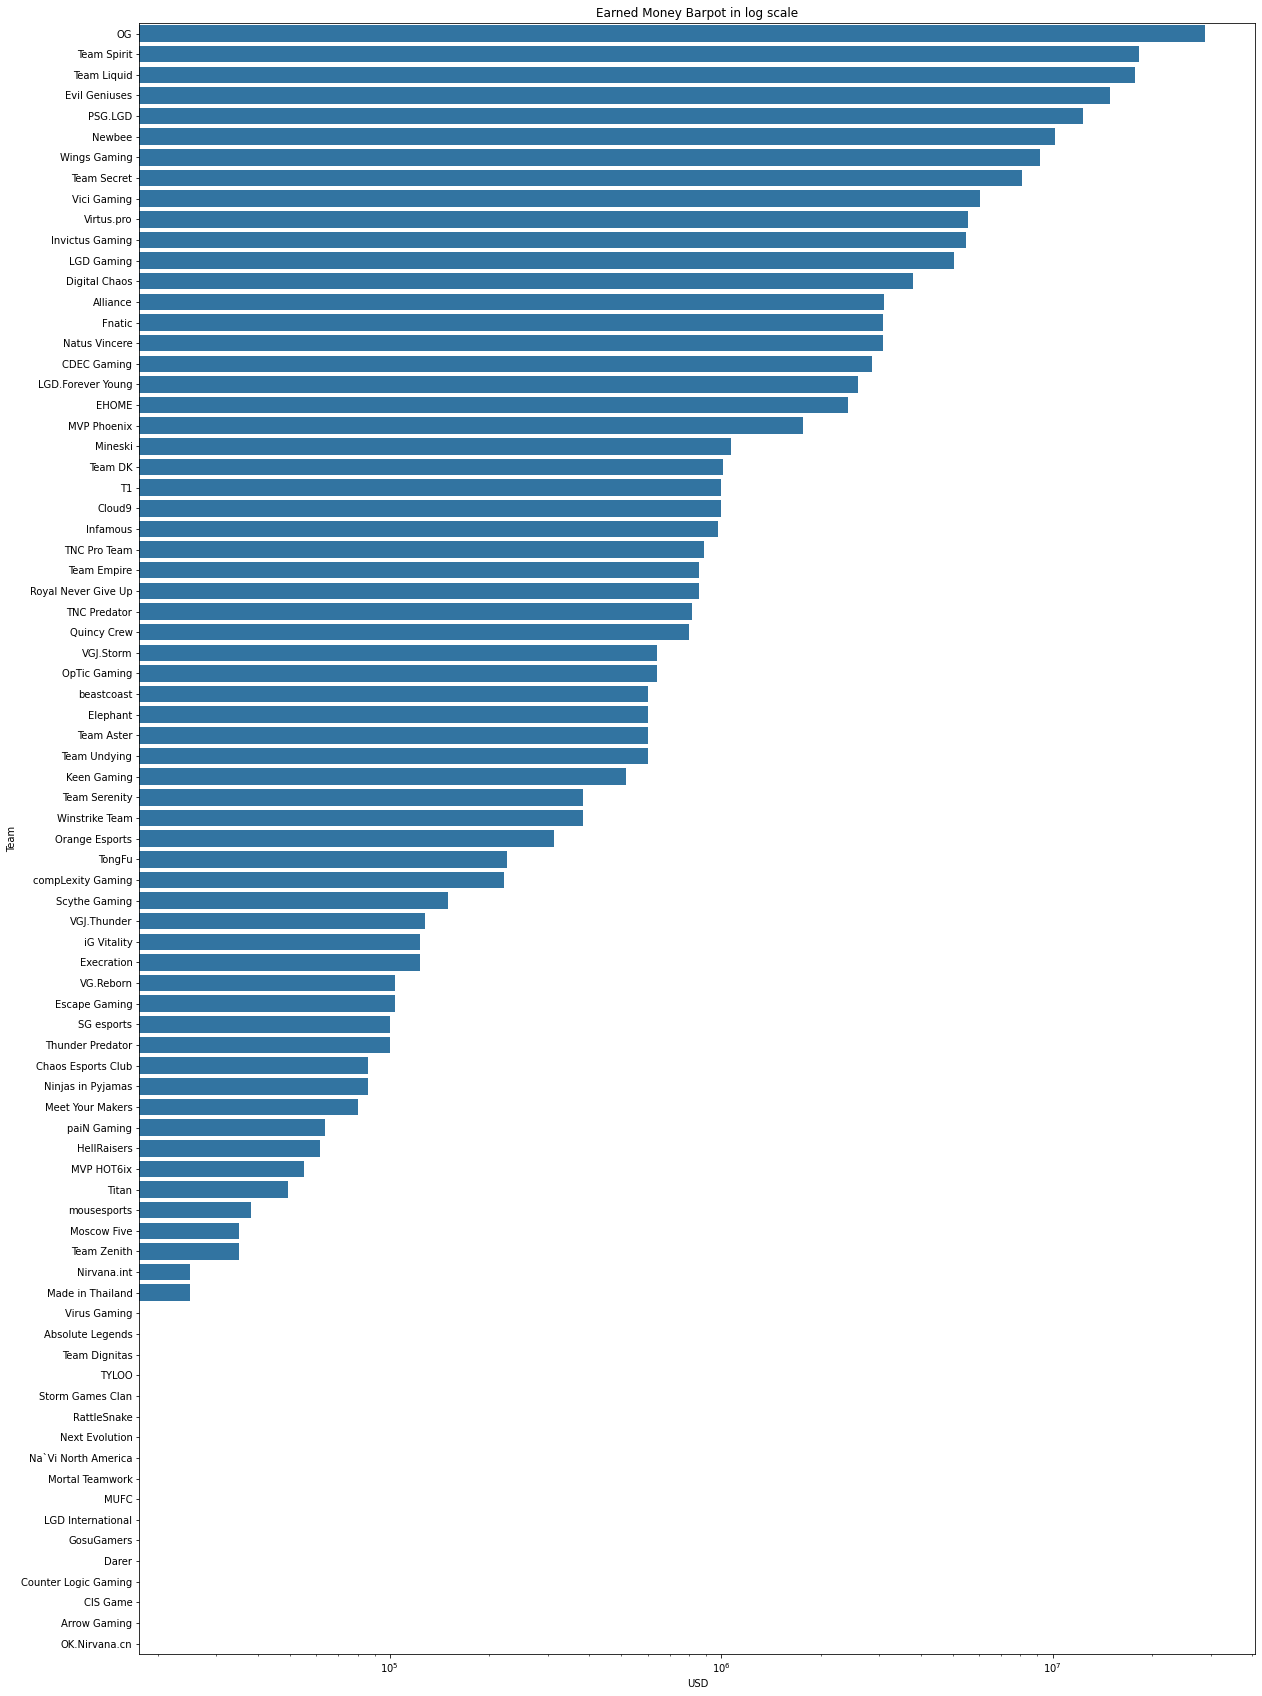

In [13]:
plt.figure(figsize=(20,30))
plt.xscale('log')
plt.title("Earned Money Barpot in log scale")
sns.barplot(y=All_money.Team, x=All_money.USD)